In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from itertools import product
import seaborn as sns
%matplotlib inline

In [2]:
data_plot = pd.read_csv('/Users/hkromer/02_PhD/tmp/data_plot.csv', index_col=0)


/Users/hkromer/anaconda3/envs/py3.7/lib/python3.8/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


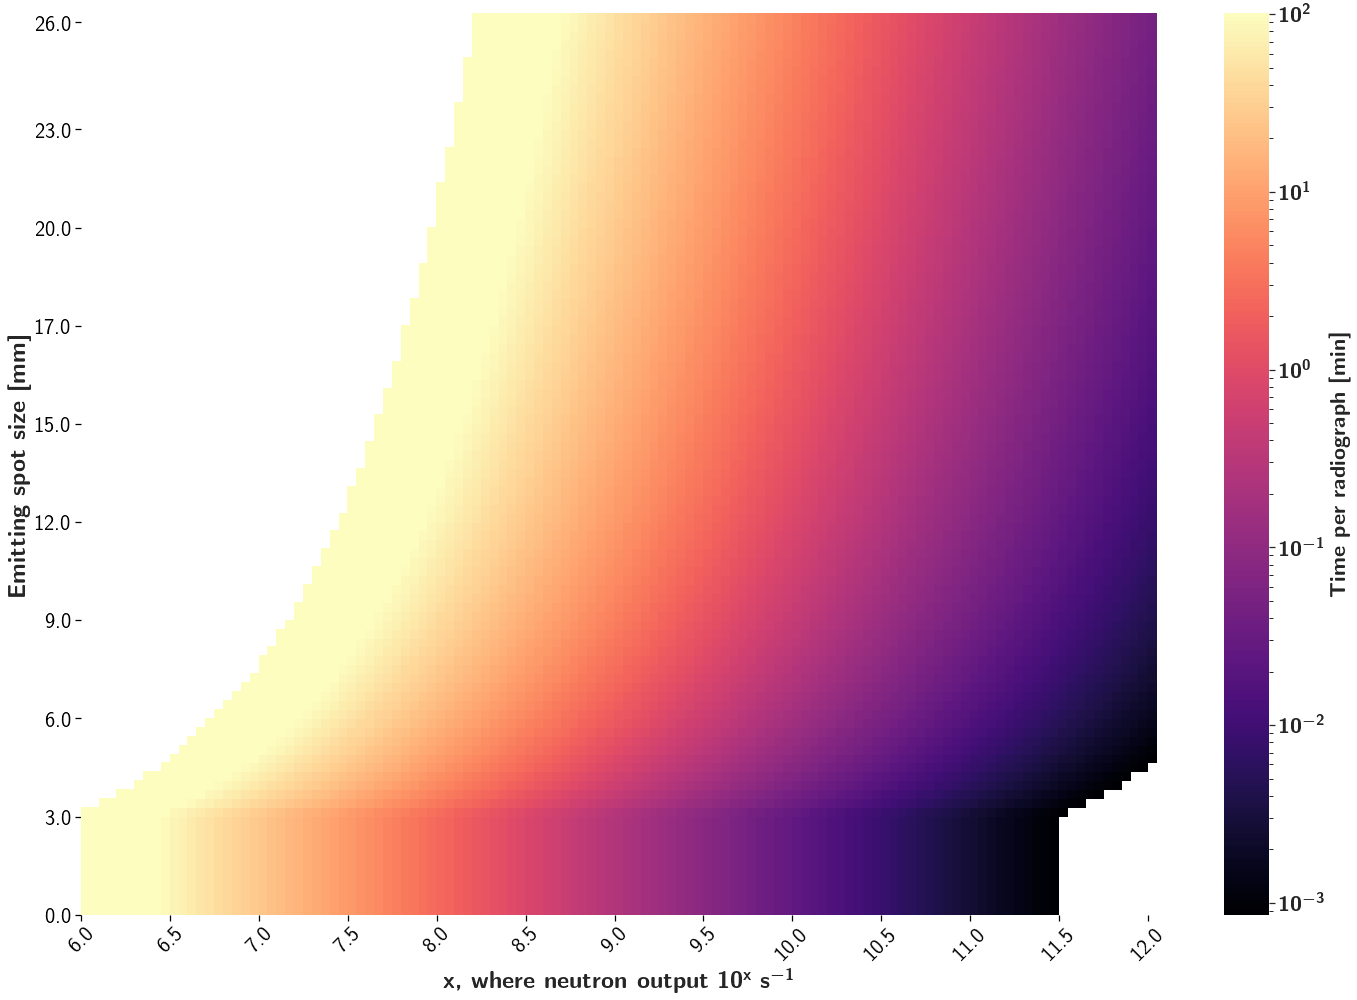

In [12]:
from matplotlib.colors import LogNorm
import math 
import os
import pandas as np
import numpy as np
from matplotlib.colors import LogNorm
import math 
import os
import matplotlib
import matplotlib.ticker as ticker
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams["font.weight"] = "bold"
matplotlib.rcParams["axes.labelweight"] = "bold"
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
#     outfile = '/Users/hkromer/02_PhD/02_Data/10.OutputVSEmittingSpot_Robert/my_plots/'
data_plot = pd.read_csv('/Users/hkromer/02_PhD/tmp/data_plot.csv', index_col=0)
data_plot.columns = data_plot.columns.astype(float)
data_plot = data_plot.loc[:, data_plot.columns <= 12]
#     outfile = f"{outfile}{run}.pdf"
fig = plt.figure(figsize=(20, 14))
num_ticks = 10
fs = 24
# ylabels
# the index of the position of yticks
ylabels = data_plot.index.values
yticks = np.linspace(0, len(ylabels) - 1, num_ticks, dtype=np.int)
# the content of labels of these yticks
yticklabels = [np.round(ylabels[idx], 0) for idx in yticks]

# xlabels
# # the index of the position of xticks
xlabels = data_plot.columns.values
xlabels = np.round(xlabels, 2)
# xticks = np.linspace(0, len(xlabels) - 1, num_ticks, dtype=np.int)
# # the content of labels of these yticks
# xticklabels = [np.round(xlabels[idx], 1) for idx in xticks]
# print(xticks, xticklabels)
xticklabels = np.arange(xlabels[0],xlabels[-1]+0.5, 0.5)
xticks = np.asarray([])
for ii in range(0,len(xticklabels)):
    for jj in range(0,len(xlabels)):
        if xticklabels[ii] == xlabels[jj]:
            xticks = np.append(xticks, jj)
xticks = xticks.astype(int)
assert xticklabels.all() == xlabels[xticks].all()

log_norm = LogNorm(vmin=data_plot.min().min(), vmax=data_plot.max().max())
cbar_ticks = [math.pow(10, i) for i in range(math.floor(math.log10(data_plot.min().min())), 1+math.ceil(math.log10(data_plot.max().max())))]

# cbar_ticks = [0,1,10,1e2,1e3,1e4,1e5]
# sns.set(font_scale = 2)
# sns.set_context("paper")
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white',"xtick.bottom" : True, "ytick.left" : True, 'font.weight': "bold"})

#     ax = sns.heatmap(data_plot, yticklabels=yticklabels, xticklabels=xticklabels, vmax=101, cmap='coolwarm', norm=log_norm, cbar_kws={"ticks": cbar_ticks})
ax = sns.heatmap(data_plot, yticklabels=yticklabels, xticklabels=xticklabels, vmax=101, cmap='magma', norm=log_norm, cbar_kws={"ticks": cbar_ticks})
ax.tick_params('x', colors='black', labelsize=fs-2)
ax.tick_params('y', colors='black', labelsize=fs-2)

# ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.invert_yaxis()
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=fs-2) 
# for label in ax.get_yticklabels():
#     label.set_size(fs-2)
#     label.set_weight("heavy")
# #     label.set_color("black")
# for label in ax.get_xticklabels():
#     label.set_size(fs-2)
#     label.set_weight("heavy")
#     label.set_color("black")


plt.xlabel(r'\textbf{x, where neutron output} $10^x$ \textbf{s$^{-1}$}', fontsize=fs)
cbar.ax.set_ylabel(r'\textbf{Time per radiograph [min]}', fontsize=fs-2, rotation=90)
plt.ylabel(r'\textbf{Emitting spot size [mm]}', fontsize=fs)
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 
plt.tight_layout()
outfile = '/Users/hkromer/02_PhD/04_Publiations/08.Defense/Figures/output_vs_imaging_time'
plt.savefig(f"{outfile}.pdf")
plt.savefig(f"{outfile}.png", dpi=900)
plt.show()

In [16]:
yticks

array([  0,  11,  22,  33,  44,  55,  66,  77,  88, 100])

In [17]:
yticklabels

[0.0, 3.0, 6.0, 9.0, 12.0, 15.0, 17.0, 20.0, 23.0, 26.0]

In [18]:
 [ylabels[idx] for idx in yticks]

[0.5,
 3.305,
 6.11,
 8.915000000000003,
 11.72,
 14.525,
 17.330000000000002,
 20.135,
 22.94,
 26.0]